COMS21202: SPS, CW2

Initially, import the libraries needed.

In [2]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

Taking a grayscale image, generate a colourmap for it.
Apply quantization to the image, done by representing a continuous function via a discrete one with quantization levels.

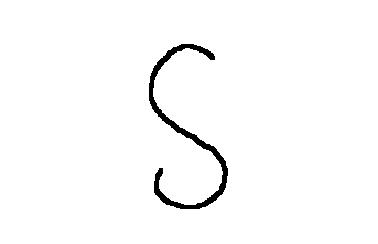

In [9]:
def gray2ind(img, levels=64):
  # this function assumes that the input image is grayscale with 256 colour levels
  if img.dtype != np.uint8 or len(img.shape) != 2:
    print( "Expected grayscale (2 dimensional) image of type uint8, got %d dimensional image of type %s." % (len(img.shape), str(img.dtype)) )
    raise

  # cast the image to double and scale to given level
  a = img/255
  a = a*(levels-1)
  a = a.round()
  a = np.uint8(a)

  # generate colourmap
  cm = np.repeat(np.linspace(0, 1, levels), 3).reshape((levels,3))

  return a, cm

def ind2plot(img, cmap):
  levels = cmap.shape[0]
  img_dsp = np.uint8(((img+1)*(256/levels))-1)

  fig = plt.figure()
  ax  = fig.add_subplot( 111 )
  ax.axis('off')
  ax.imshow( img_dsp, cmap='gray' ) # io.
  plt.show()

F = io.imread('S1.GIF')
X, Xmap = gray2ind(F, 6) # 2, 6, or 16
ind2plot(X, Xmap)

Fast Fourier Transform code, used to apply frequency decomposition.

In [22]:
def fft2(name):
    f = io.imread(name)   # read in image
    f_f = np.array(f, dtype=float)
    z = np.fft.fft2(f_f)           # do fourier transform
    q = np.fft.fftshift(z)         # puts u=0,v=0 in the centre
    Magq =  np.absolute(q)         # magnitude spectrum
    Phaseq = np.angle(q)           # phase spectrum

    fig1 = plt.figure()
    ax1  = fig1.add_subplot( 111 )
    ax1.axis('off')
    # Usually for viewing purposes:
    ax1.imshow( np.log( np.absolute(q) + 1 ), cmap='gray' ) # io.

    w = np.fft.ifft2( np.fft.ifftshift(q) ) # do inverse fourier transform
    #
    fig2 = plt.figure()
    ax2  = fig2.add_subplot( 111 )
    ax2.axis('off')
    ax2.imshow( np.array(w,dtype=int), cmap='gray' ) # io.

    plt.show()

/home/baron/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


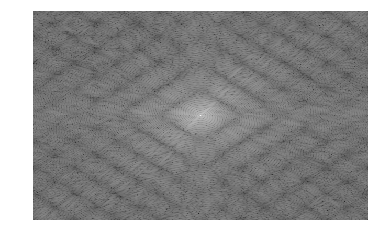

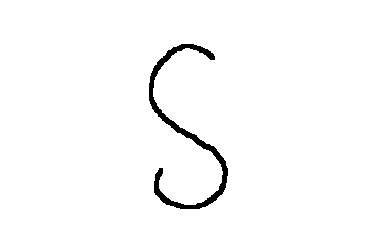

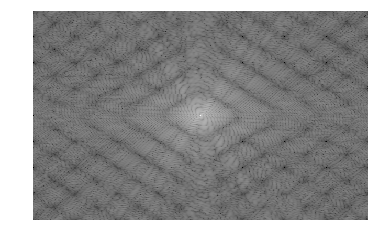

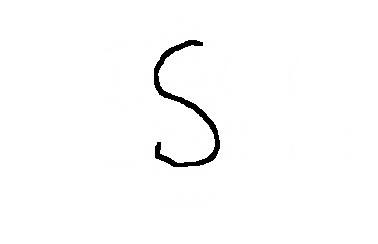

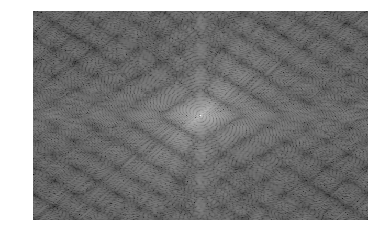

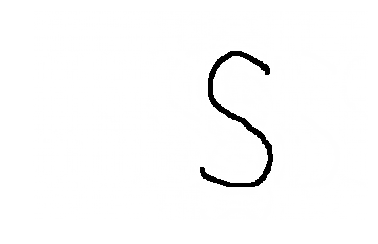

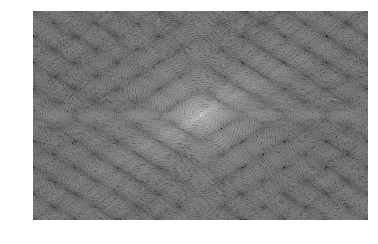

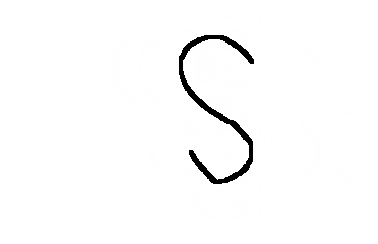

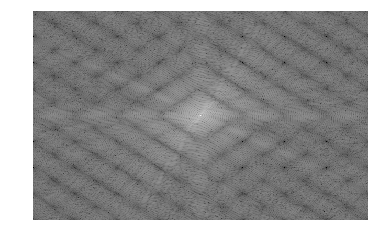

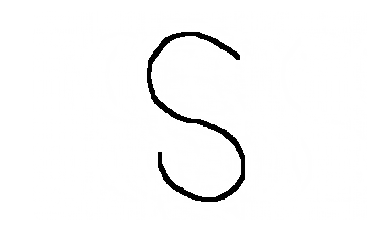

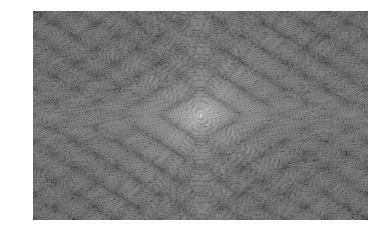

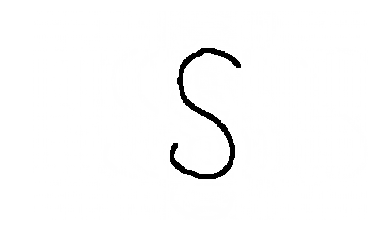

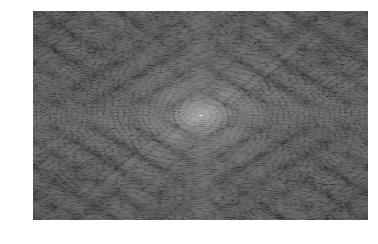

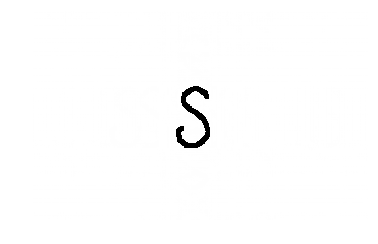

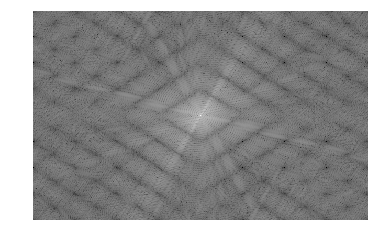

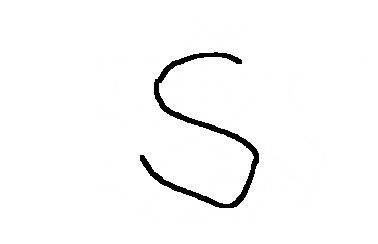

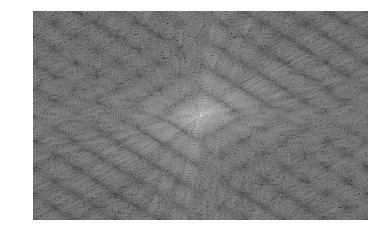

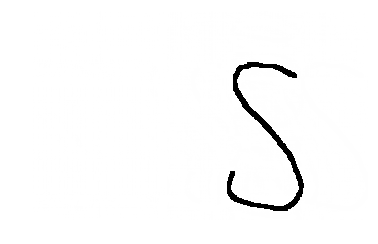

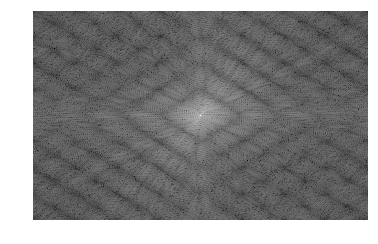

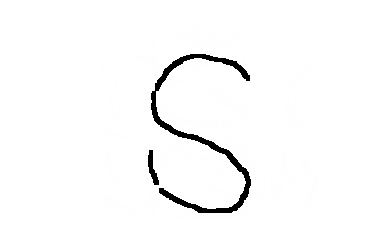

In [23]:
fft2('S1.GIF')
fft2('S2.GIF')
fft2('S3.GIF')
fft2('S4.GIF')
fft2('S5.GIF')
fft2('S6.GIF')
fft2('S7.GIF')
fft2('S8.GIF')
fft2('S9.GIF')
fft2('S10.GIF')